In [1]:
from rdflib import URIRef,Literal,Namespace,Graph
from rdflib.namespace import FOAF,XSD,RDF,SDO 

In [2]:
s=Namespace('http://test.com/B/')
p=Namespace('http://xmlns.com/foaf/0.1/')

In [3]:
year=Literal('1956',datatype=p['integer'])

In [4]:
susie=s['susie']
frank=s['Frank']
sandra=s['sandra']
jon=s['jon']
women=p['women']

In [5]:
g= Graph()
g.bind('s',s)
g.bind('p',p)

In [6]:
g.add((susie,p['bornIn'],year))
g.add((susie,p['hasChild'],frank))
g.add((susie,p['are'],women))
g.add((frank,p['motherIS'],susie))
g.add((frank,p['married'],sandra))
g.add((frank,p['hasChild'],jon))
g.add((sandra,p['hasChild'],jon))
g.add((sandra,p['married'],frank))
g.add((sandra,p['are'],women))
g.add((jon,p['motherIS'],sandra))
g.add((jon,p['fatherIS'],frank))

<Graph identifier=N0ac35da3327f4d02b28e84cf206bd097 (<class 'rdflib.graph.Graph'>)>

In [7]:
print(g.serialize(format='xml'))

<?xml version="1.0" encoding="utf-8"?>
<rdf:RDF
   xmlns:p="http://xmlns.com/foaf/0.1/"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
>
  <rdf:Description rdf:about="http://test.com/B/susie">
    <p:bornIn rdf:datatype="http://xmlns.com/foaf/0.1/integer">1956</p:bornIn>
    <p:hasChild rdf:resource="http://test.com/B/Frank"/>
    <p:are rdf:resource="http://xmlns.com/foaf/0.1/women"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://test.com/B/sandra">
    <p:hasChild rdf:resource="http://test.com/B/jon"/>
    <p:married rdf:resource="http://test.com/B/Frank"/>
    <p:are rdf:resource="http://xmlns.com/foaf/0.1/women"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://test.com/B/jon">
    <p:motherIS rdf:resource="http://test.com/B/sandra"/>
    <p:fatherIS rdf:resource="http://test.com/B/Frank"/>
  </rdf:Description>
  <rdf:Description rdf:about="http://test.com/B/Frank">
    <p:motherIS rdf:resource="http://test.com/B/susie"/>
    <p:married rdf:resourc

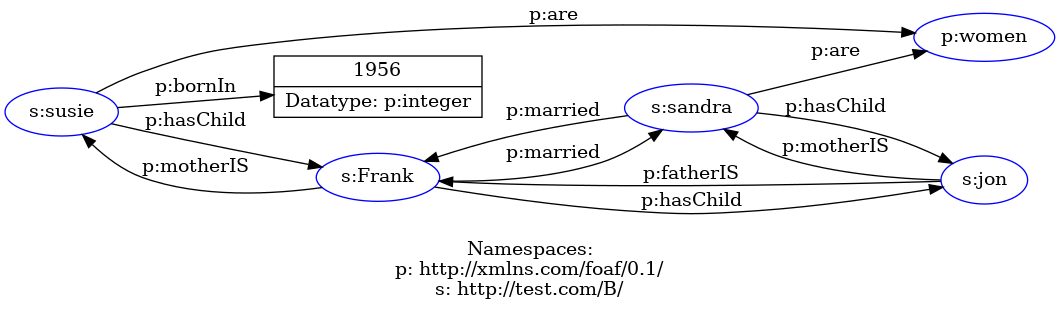

In [8]:
import requests
from IPython.display import Image
params = {
    'rdf': g.serialize(format='ttl'),
    'from': 'ttl',
    'to':'png'
    }
response = requests.get('http://www.ldf.fi/service/rdf-grapher',params=params)
img = Image(response.content)
display(img)